In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd, orth, qr
from scipy.optimize import curve_fit
from numpy import sin, cos, pi
cmap = plt.cm.plasma

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
from initial_conditions import Domain, Heaviside, LinearRamp, SmoothRamp, Sigmoid, CkRamp
from basis_functions import SVD, Trigonometric, Trigonometric2, TrigonometricOdd, Greedy, LNA, LPF, Sinc, Fourier
from basis_functions import projection_error, L2_per_snapshot, integrate

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
page_width_pt = 455.24
pt2in = 0.01389 
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

fs = 10
fs_lbl = 6
plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.size'] = fs
plt.rcParams['axes.titlesize'] = fs
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['legend.labelspacing'] = 0.0
plt.rcParams['legend.fontsize'] = fs_lbl
plt.rcParams['legend.handlelength'] = 1.0

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')
pth = "../Plots/"

pth = "C:/Users/florianma/Dropbox/Kol-N-width-Oslo-Ulm/Plots/"

8.030570172000001


In [4]:
VALIDATE = False
m, n, r = 2500, 2500, 2500
x = Domain([0, 1], m)
mu = Domain([0, 1], n)

In [5]:
results = np.zeros((6, 9, 4, r))
epsilon = 0.025
u_hs = Heaviside()
u_C1 = CkRamp(epsilon, 1)


In [6]:
trig_basis_odd = TrigonometricOdd(x())

X = u_C1.half_wave_odd(x(), mu())
#trig_basis_odd.sort(X)


In [7]:
def calc_error(X, U):
    diff = projection_error(X, U)
    norm = L2_per_snapshot(diff)
    # norm = np.mean((X - basis @ (basis.T @ X))**2)**.5
    delta_n = integrate(norm)
    d_n = norm.max()
    return delta_n, d_n




0 0.9935506507169742 0.9935506507169747


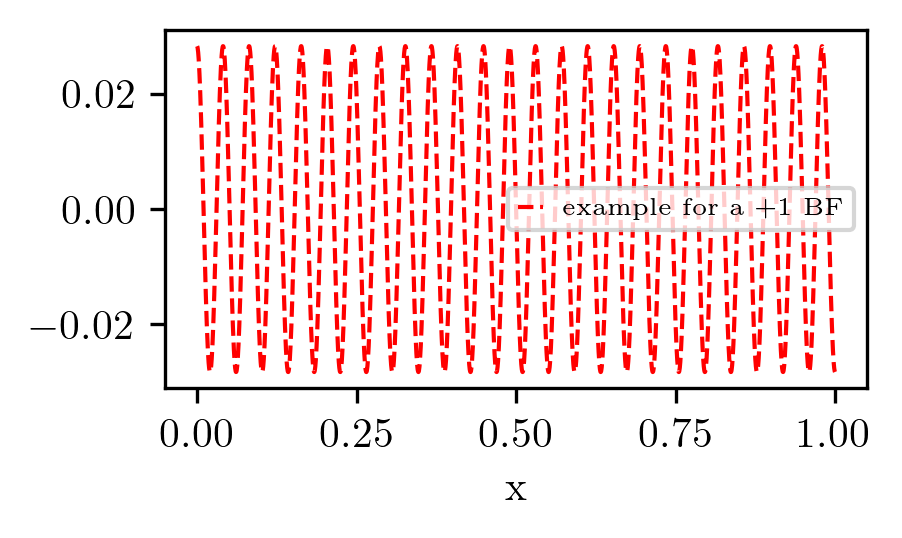

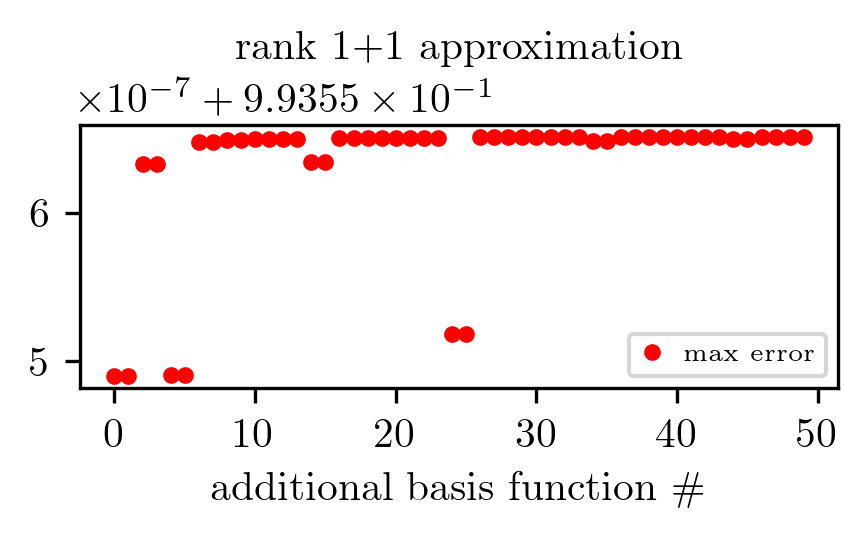

1 0.736366714344755 0.9935504897280502


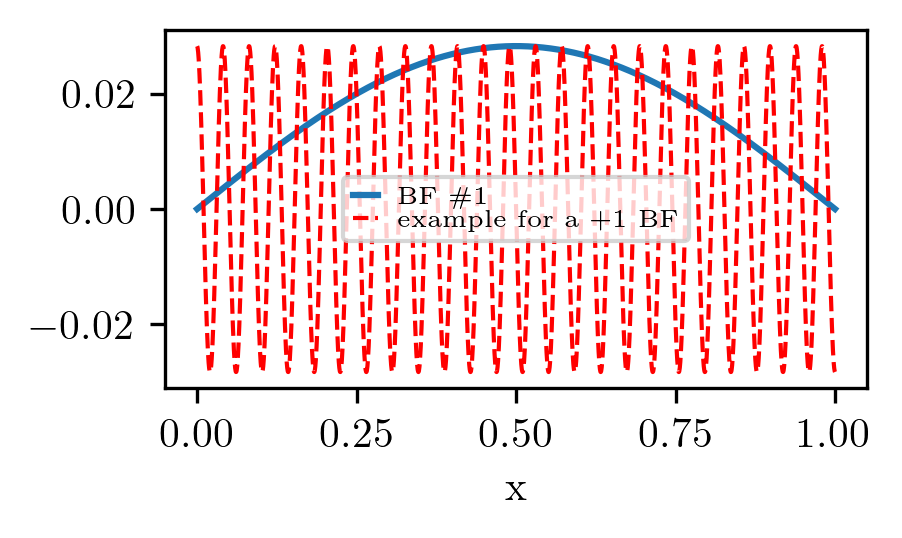

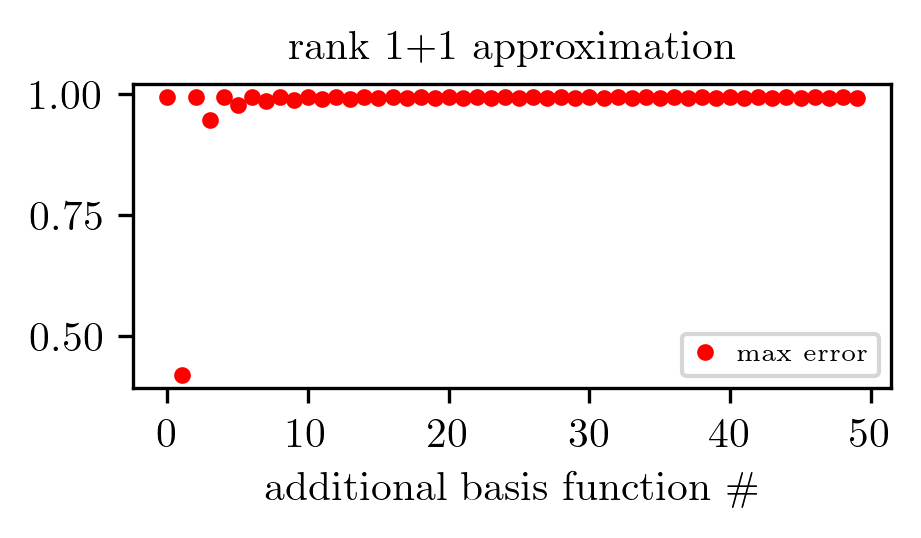

2 0.420503735348175 0.4205037353481758


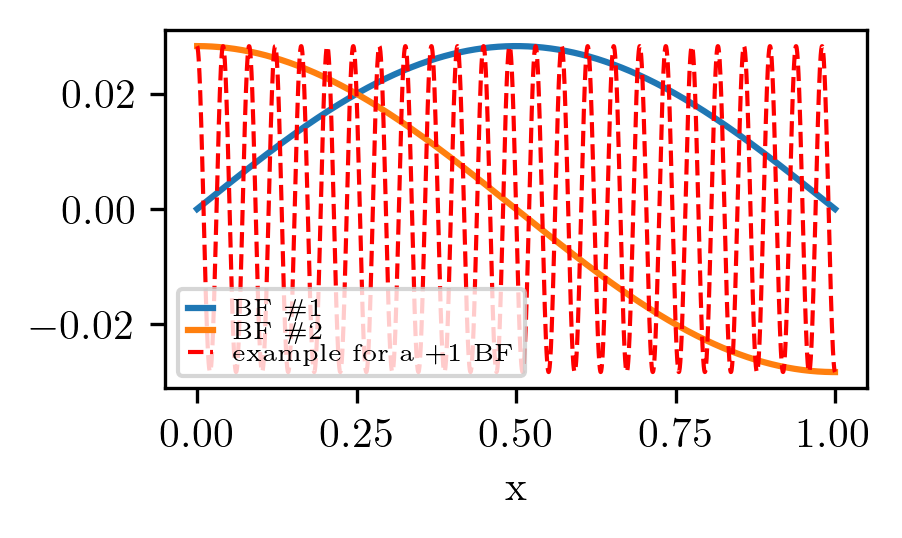

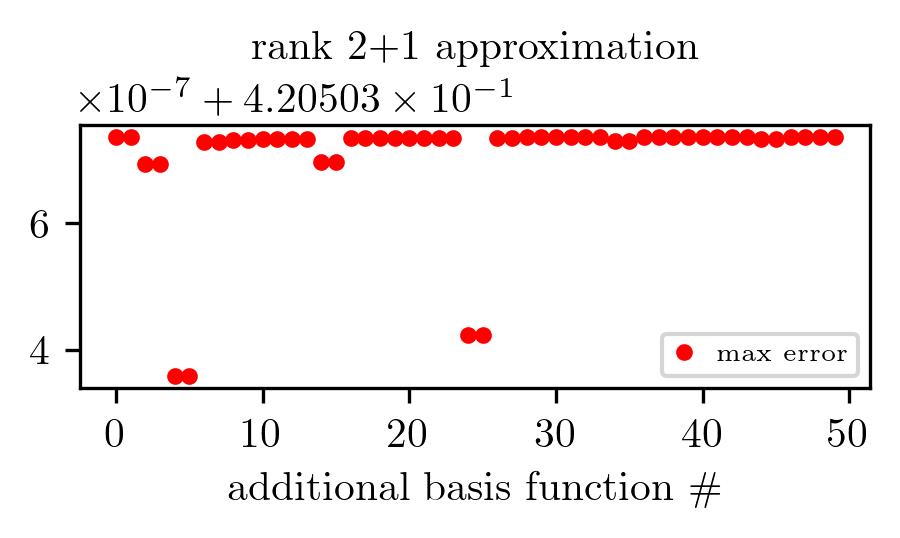

3 0.3604973316980053 0.4205036931880568


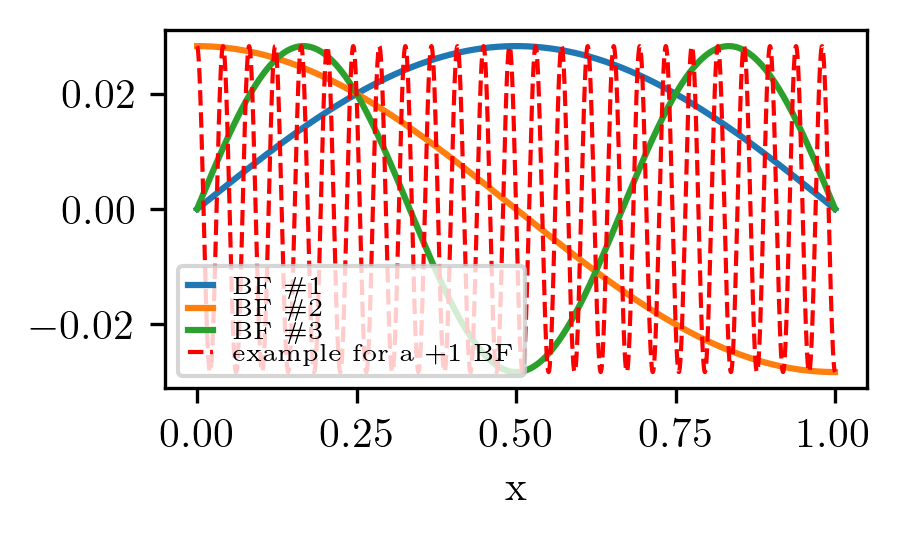

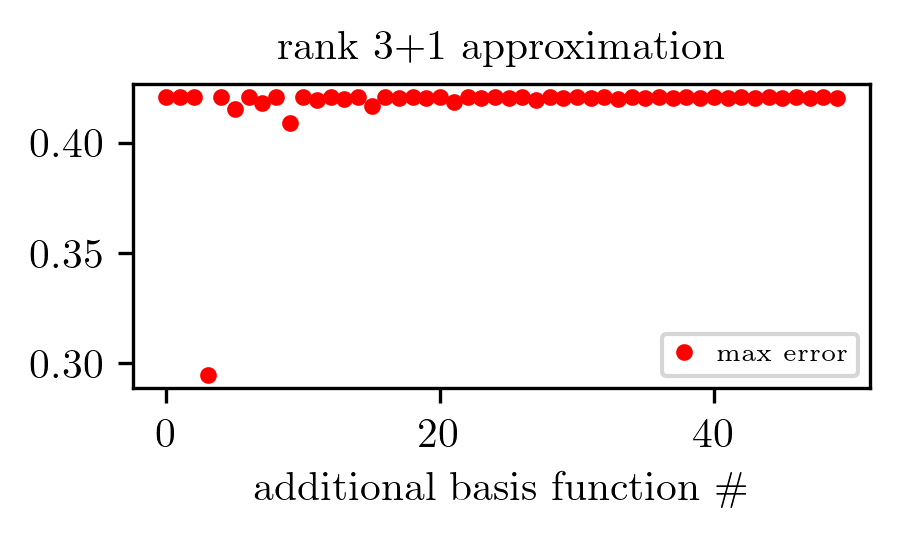

4 0.2949742666343724 0.29497426663437265


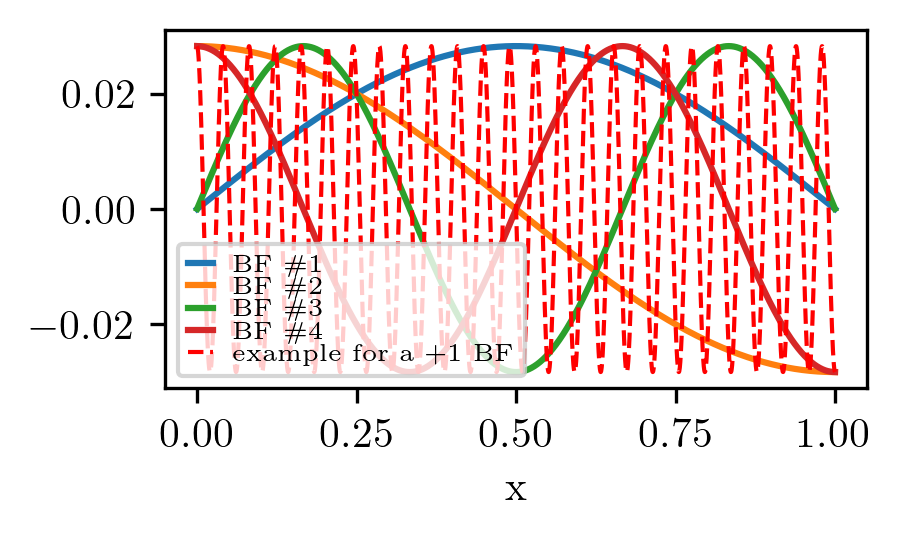

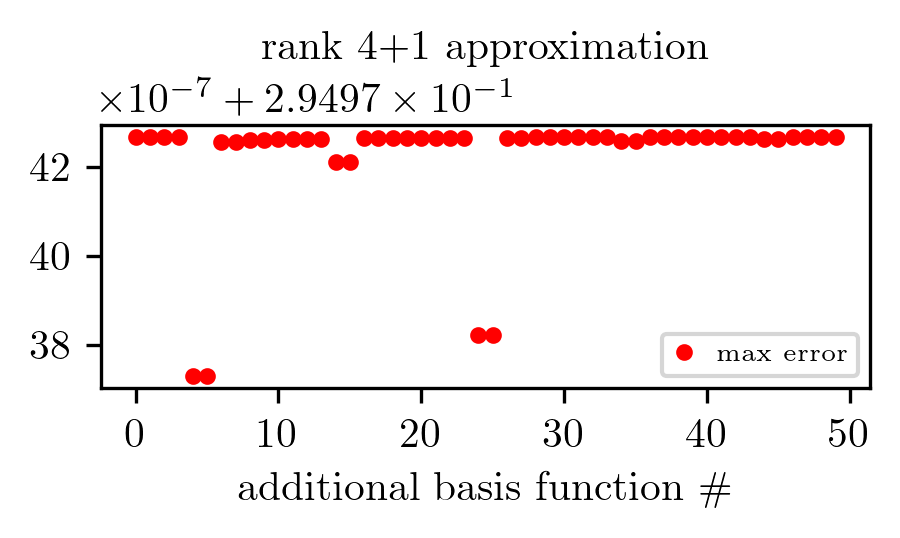

5 0.2654468635524373 0.2949737283840284


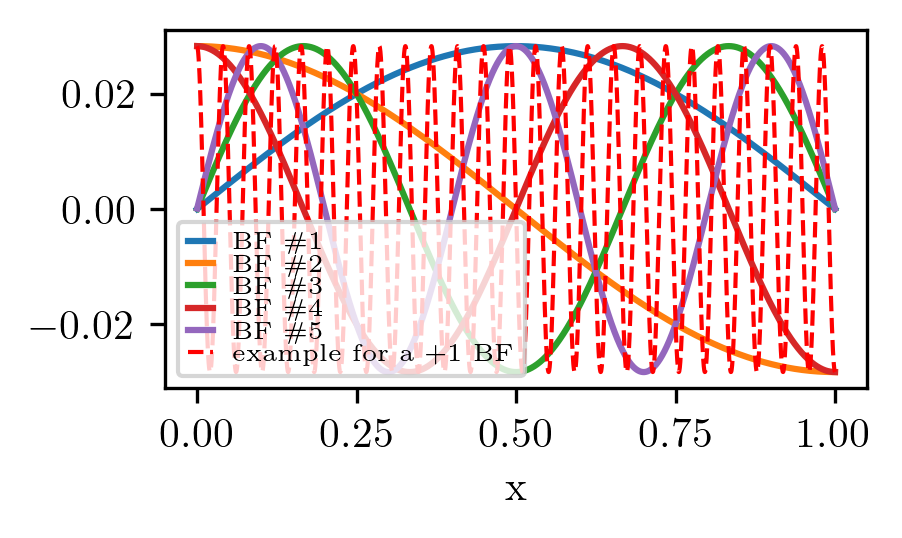

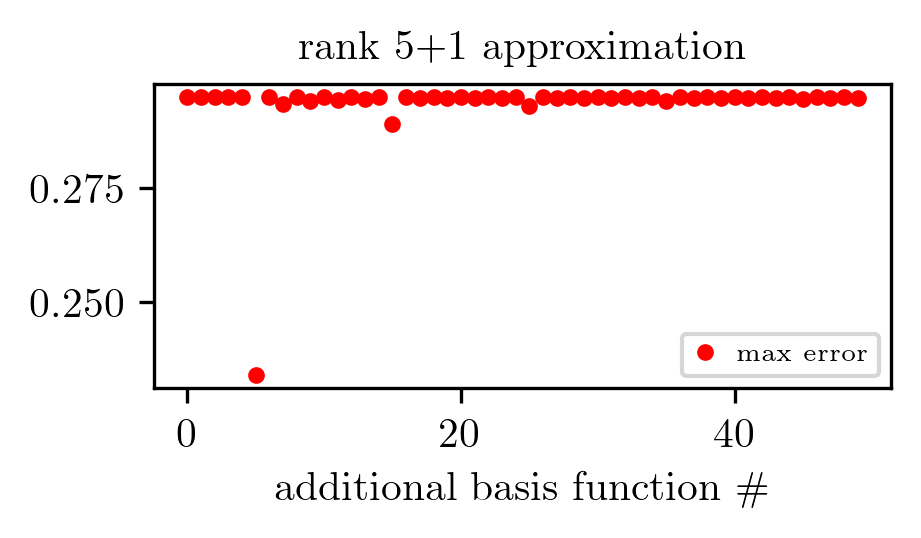

6 0.23417133203116308 0.2341713320311637


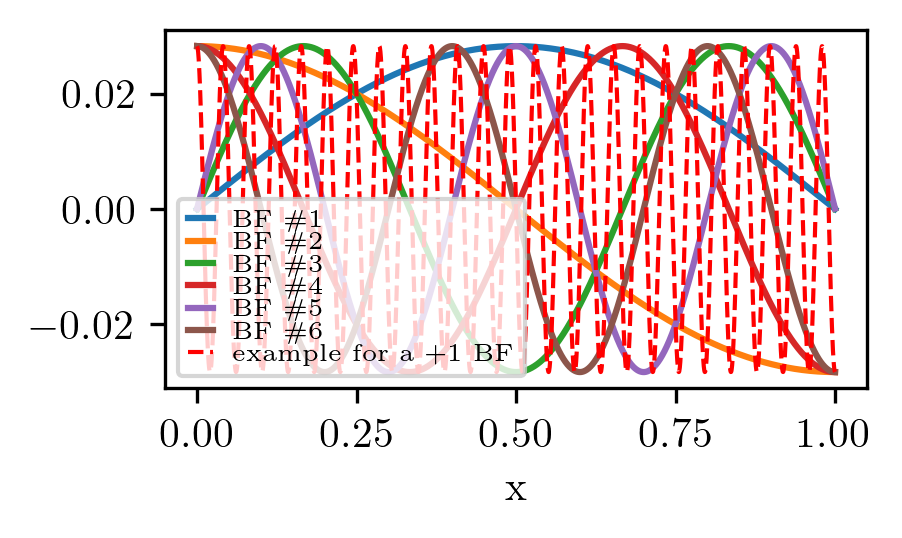

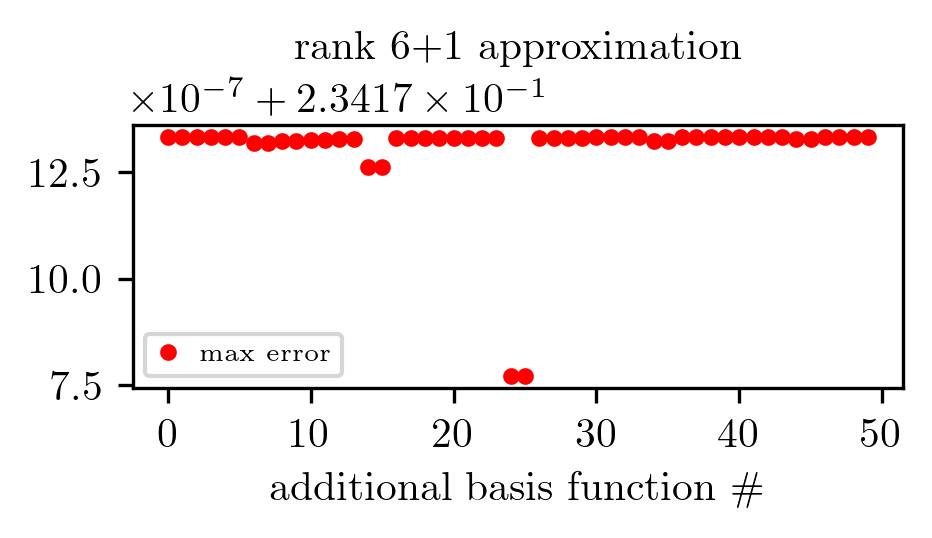

In [15]:
n_ranks_to_test = 7
n_trials = 50
for i in range(n_ranks_to_test):
    U = trig_basis_odd.U[:, :i]
    meane, maxe = calc_error(X, U)
    print(i, meane, maxe)
    
    mean_error, max_error = np.zeros(n_trials,), np.zeros(n_trials,)
    mean_error[:] = meane
    max_error[:] = maxe
    for j in range(i, n_trials):
        U2 = np.c_[U, trig_basis_odd.U[:, j]]
        
        mean_error[j], max_error[j] = calc_error(X, U2)
        #print("     ", j, delta_n, d_n)
    for i in range(U2.shape[1]-1):
        plt.plot(x(), U2[:, i], label=f"BF \#{i+1}")
    plt.plot(x(), U2[:, -1], "r--", lw=1, label="example for a +1 BF")
    plt.legend()
    plt.xlabel("x")
    plt.show()

    #plt.plot(mean_error, "g.", label="mean error")
    plt.plot(max_error, "r.", label="max error")
    plt.title(f"rank {i+1}+1 approximation")
    plt.xlabel("additional basis function \#")
    plt.legend()
    plt.show()

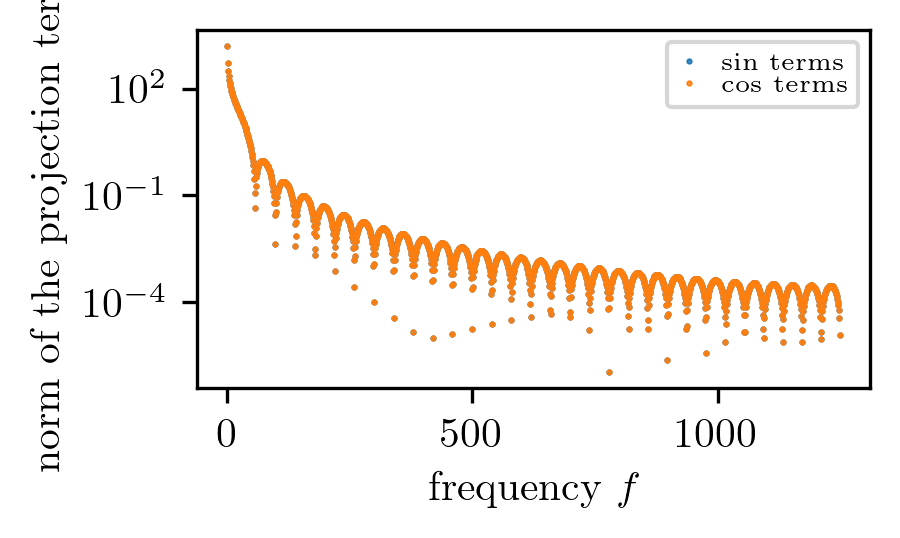

In [12]:
trig_basis_odd.sort(X)
trig_basis_odd = TrigonometricOdd(x())

Constantin
------------
Also das habe ich schon bewiesen. 

Wenn g odd hws.

Wenn wir unsere sin((2k-1)*pi*x),cos((2k-1)*pi*x) Basis nehmen, dann ist V_{2M} sowohl L_2-optimal als auch L_{infty}-optimal.

Nun kann man jede erdenkliche Funktion phi nehmen und den Raum V_{2M}+{phi} bauen und keine Funktion phi kann den Fehler reduzieren. 

Daraus folgt aber nicht d_{2M}=d_{2M+1} weil es nicht sein muss, dass wir überhaupt unseren Raum mit Funktionen des Typs sin((2k-1)*pi*x),cos((2k-1)*pi*x) bauen.
Also so wie du mit deinen Experimenten gezeigt hast.
Aber das ist gut, jetzt sind wir auf dem gleichen Wissensstand.

Die Frage ist d_{2M}=d_{2M+1}? Ich will das wenigstens als Vermutung rein schreiben als ein Satz und will dann das Richtige vermuten.

Welches Experiment braucht man jetzt?

Wir starten mit N=2 und irgendeiner zufälligen odd hws Funktion g.

Nun lässt sich leicht die optimale Frequenz k* berechnen, sodass V_2 = span{sin((2k*-1)pi*x),  cos((2k*-1)pi*x)} der optimale Raum ist. 
Jetzt kann man d_2(U) davon leicht berechnen. 

Jetzt bauen wir uns Räume H_3=span{phi1, phi2, phi3} und
die Zahl d_2(U) ist jetzt unsere Benchmark. 
Sobald wir einen Raum H_3 gefunden haben mit dist(H_3) < d_2(U) stimmt die Vermutung nicht. (Es muss natürlich deutlich kleiner sein wegen numerischen Fehlern)

Nun muss man einen Algorithmus bauen welcher 3 zufällige Funktionen phi1, phi2, phi3 erzeugt. 
Möglichkeit: Erzeuge 3 zufällige Vektoren a=(a_1,…,a_10), b=(b_1,…,b_10), c=(c_1,…,c_10) der Länge 10 (oder länger), mache sie zu einer ONB Basis mit Gram-Schmimdt.

Nun kann man durch phi1= a_1 sin(1*pi*x)+ a_2 sin(3*pi*x)+ …+ a_19 sin(19*pi*x)
diese Vektoren isometrisch auf Funktionen mappen.

Fragen
-----------------------------------------------
warum 10?
ist sin(1*pi*x)...sin(19*pi*x) die Basis? sind die Frequenzen sortiert?


In [21]:
def gram_schmidt(X):
    """
    Führt die Gram-Schmidt-Orthogonalisierung auf die Spalten der Matrix X durch.
    
    Parameters:
    X : np.ndarray
        Eingabematrix mit Dimension (m, n) mit m Zeilen und n Spalten.
        
    Returns:
    Q : np.ndarray
        Matrix mit orthonormalen Spalten, Dimension (m, n).
    """
    # Dimensionen der Eingabematrix
    m, n = X.shape
    # Initialisiere Matrix für orthonormale Vektoren
    Q = np.zeros((m, n))
    for i in range(n):
        # Der aktuelle Vektor in X, den wir orthogonalisieren möchten
        vi = X[:, i]
        # Orthogonalisierung gegen alle vorherigen Vektoren
        for j in range(i):
            vi -= np.dot(Q[:, j].T, X[:, i]) * Q[:, j]
        # Normalisiere den Vektor
        norm_vi = np.linalg.norm(vi)
        if norm_vi > 1e-10:  # Vermeide Division durch Null
            Q[:, i] = vi / norm_vi
        else:
            raise ValueError("Der Vektor ist zu klein zum Normalisieren.")
    return Q

[[ 1.00000000e+00 -8.26111803e-18  2.41875186e-19]
 [-8.26111803e-18  1.00000000e+00  1.42699486e-17]
 [ 2.41875186e-19  1.42699486e-17  1.00000000e+00]]
(50, 3)
(10,) (2500, 10) (2500,)


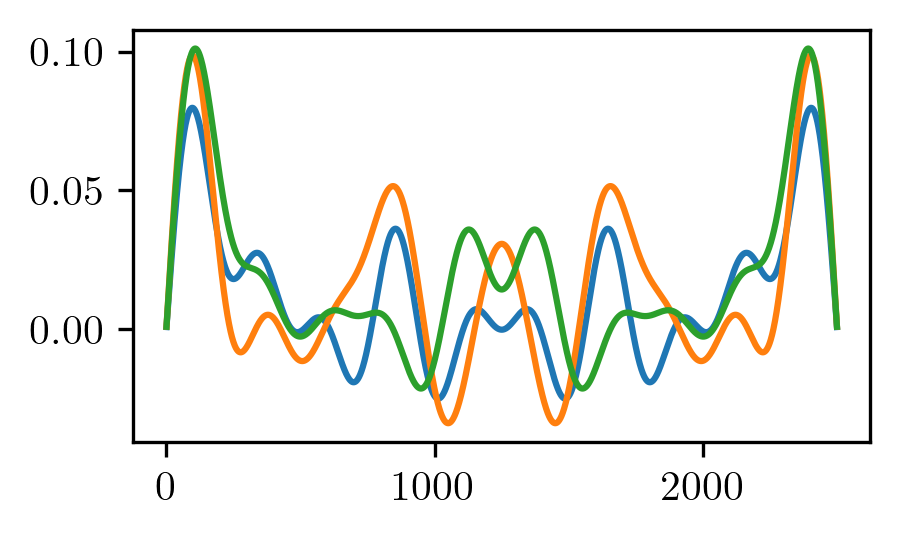

In [28]:
n_Consti = 10
abc = np.random.rand(n_Consti, 3)
abc_n = gram_schmidt(phi13)
print(abc_n.T @ abc_n)
print(abc_n.shape)

Usin = trig_basis_odd.U[:, ::2][:, :n_Consti]
Ucos = trig_basis_odd.U[:, 1::2][:, :n_Consti]
phi1 = np.sum(abc[:, 0] * Usin, axis=1)
phi2 = np.sum(abc[:, 1] * Usin, axis=1)
phi3 = np.sum(abc[:, 2] * Usin, axis=1)
print(abc[:, 0].shape, Usin.shape, phi1.shape)
plt.plot(phi1)
plt.plot(phi2)
plt.plot(phi3)